In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
import statsmodels.api as sm


In [2]:
df = pd.read_csv("EV Stats-1.csv")

In [3]:
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


Description and information of the dataset

In [4]:
df.shape

(35, 10)

In [5]:
df.describe()

,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,720.000000,105571.000000,27.000000,260863.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              34 non-null     object 
 1   State                                                               34 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 34 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     float64
 7   Passenger Cars (Cat

Finding the null values

In [7]:
df.isna().sum()

Sl. No                                                                1
State                                                                 1
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    4
Two Wheelers (Category L2 (CMVR))                                     4
Two Wheelers (Max power not exceeding 250 Watts)                      4
Three Wheelers (Category L5 slow speed as per CMVR)                   1
Three Wheelers (Category L5 as per CMVR)                              4
Passenger Cars (Category M1 as per CMVR)                              4
Buses                                                                 4
Total in state                                                        4
dtype: int64

As we can see that the dataset is having null values lets remove null values from the dataset.

In [8]:
df_clean = df.drop([31,32,33,34],axis =0, inplace=True)

In [9]:
df.shape

(31, 10)

In [10]:
df.isna().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

Now we have removed the null values from the dataset do we can proceed to next steps.

As we can see that the last row is total so lets remove that last row for our futher analysis to get more clarity about which stata having more vehciles and which vehicle is more

In [11]:
df_new = df.drop([30],axis =0, inplace=True)

In [12]:
df.shape

(30, 10)

Pair plotting for the dataset

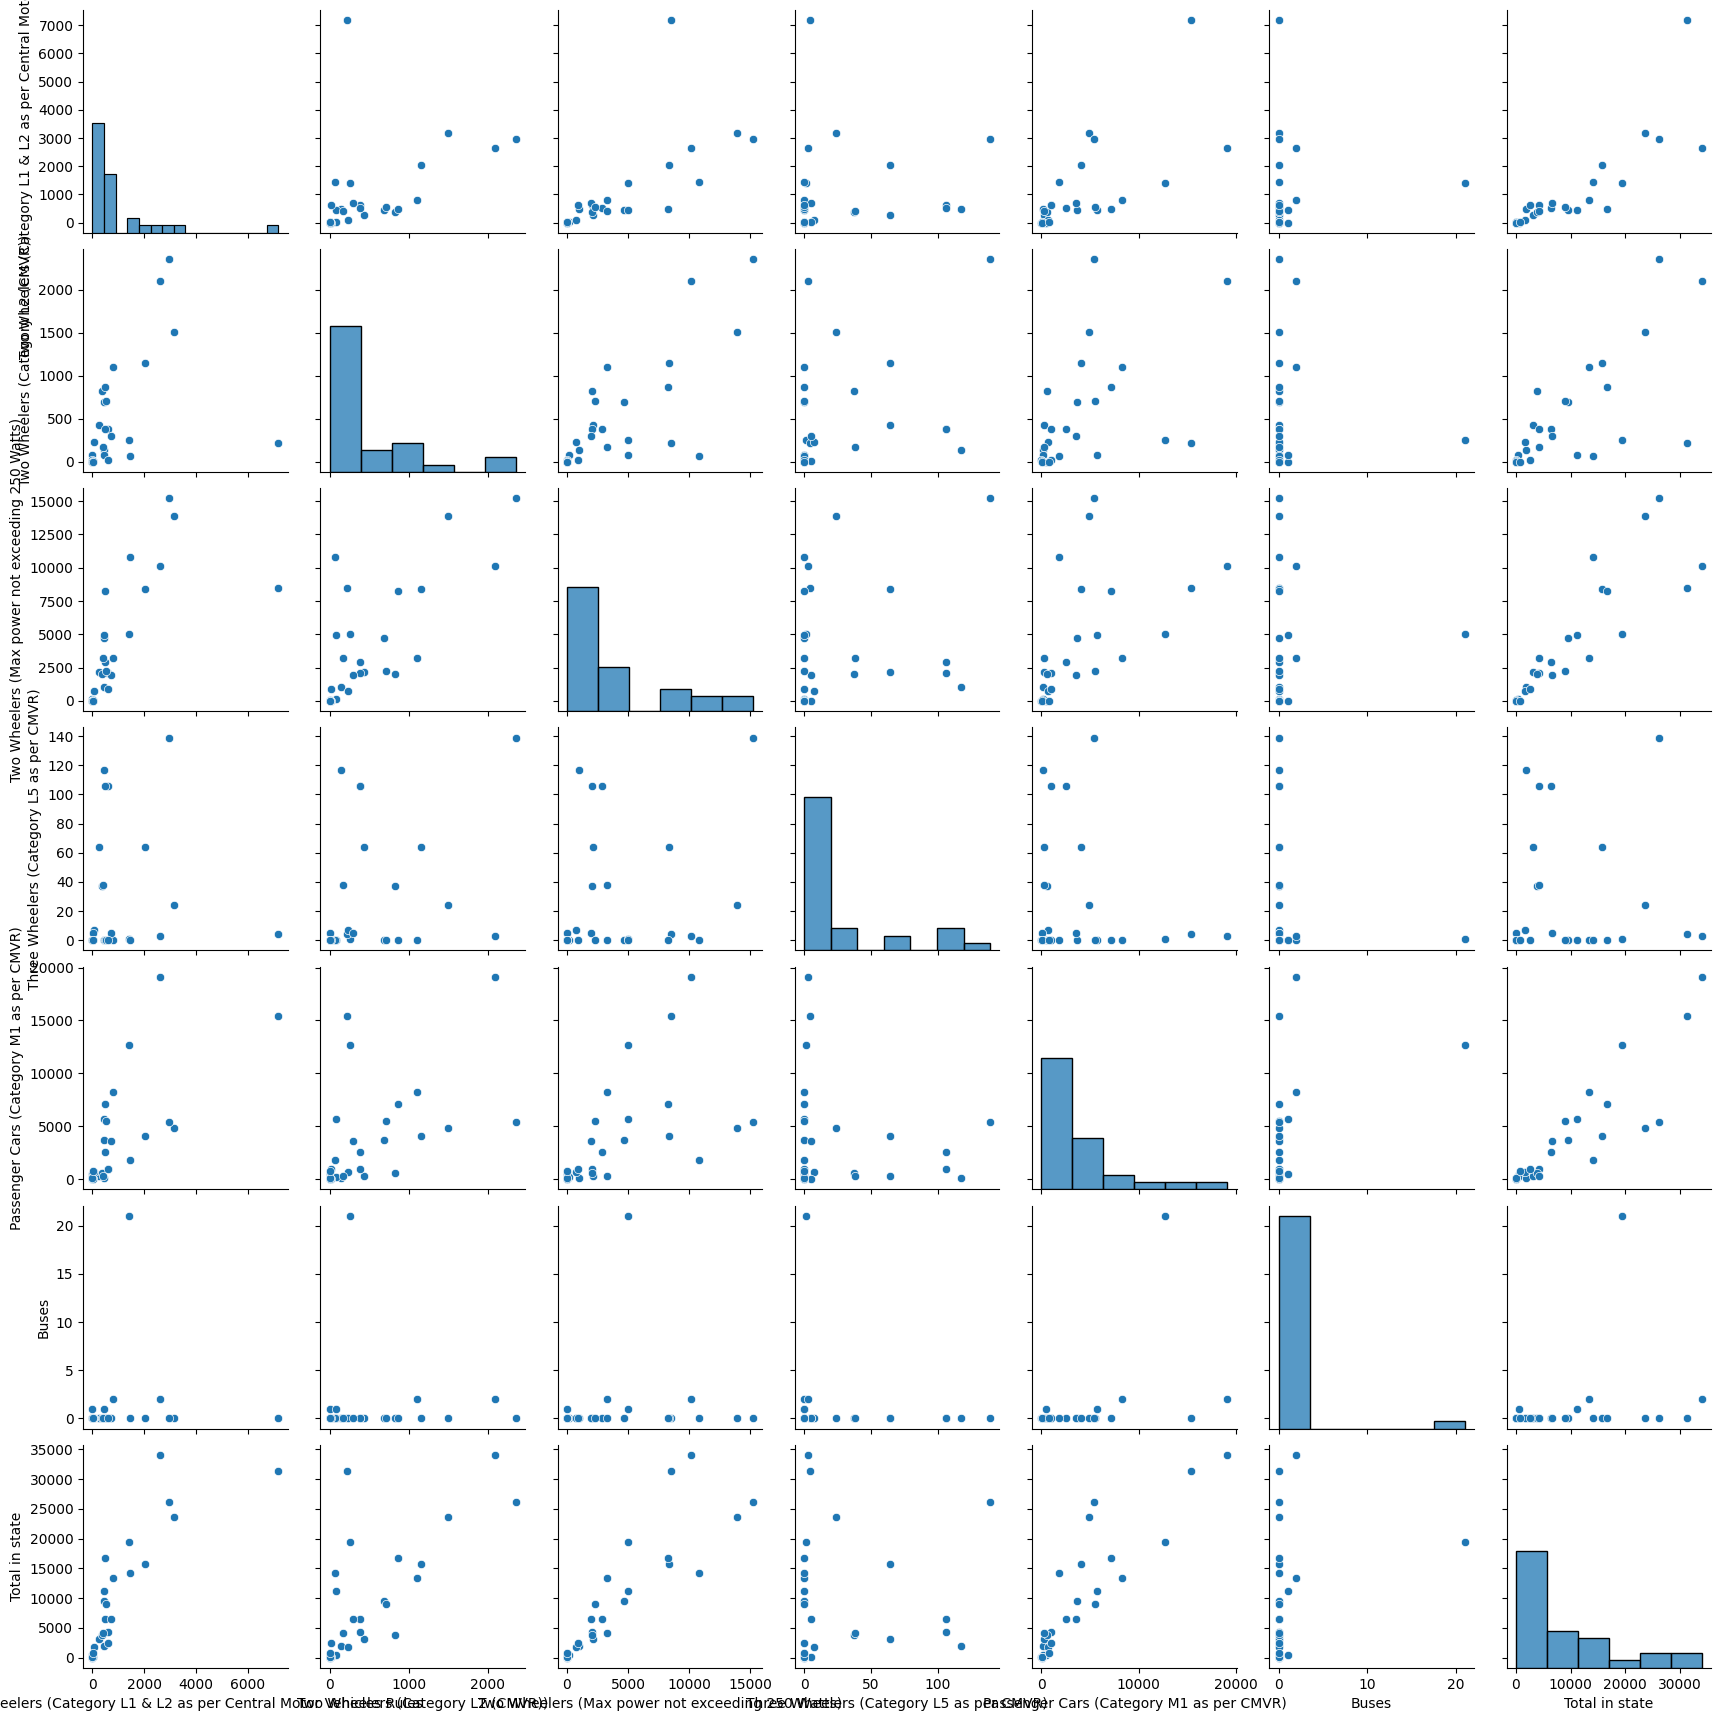

In [13]:
sns.pairplot(df)

Heat Map for the given dataset

<ipython-input-14-ee0b69a6e32b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


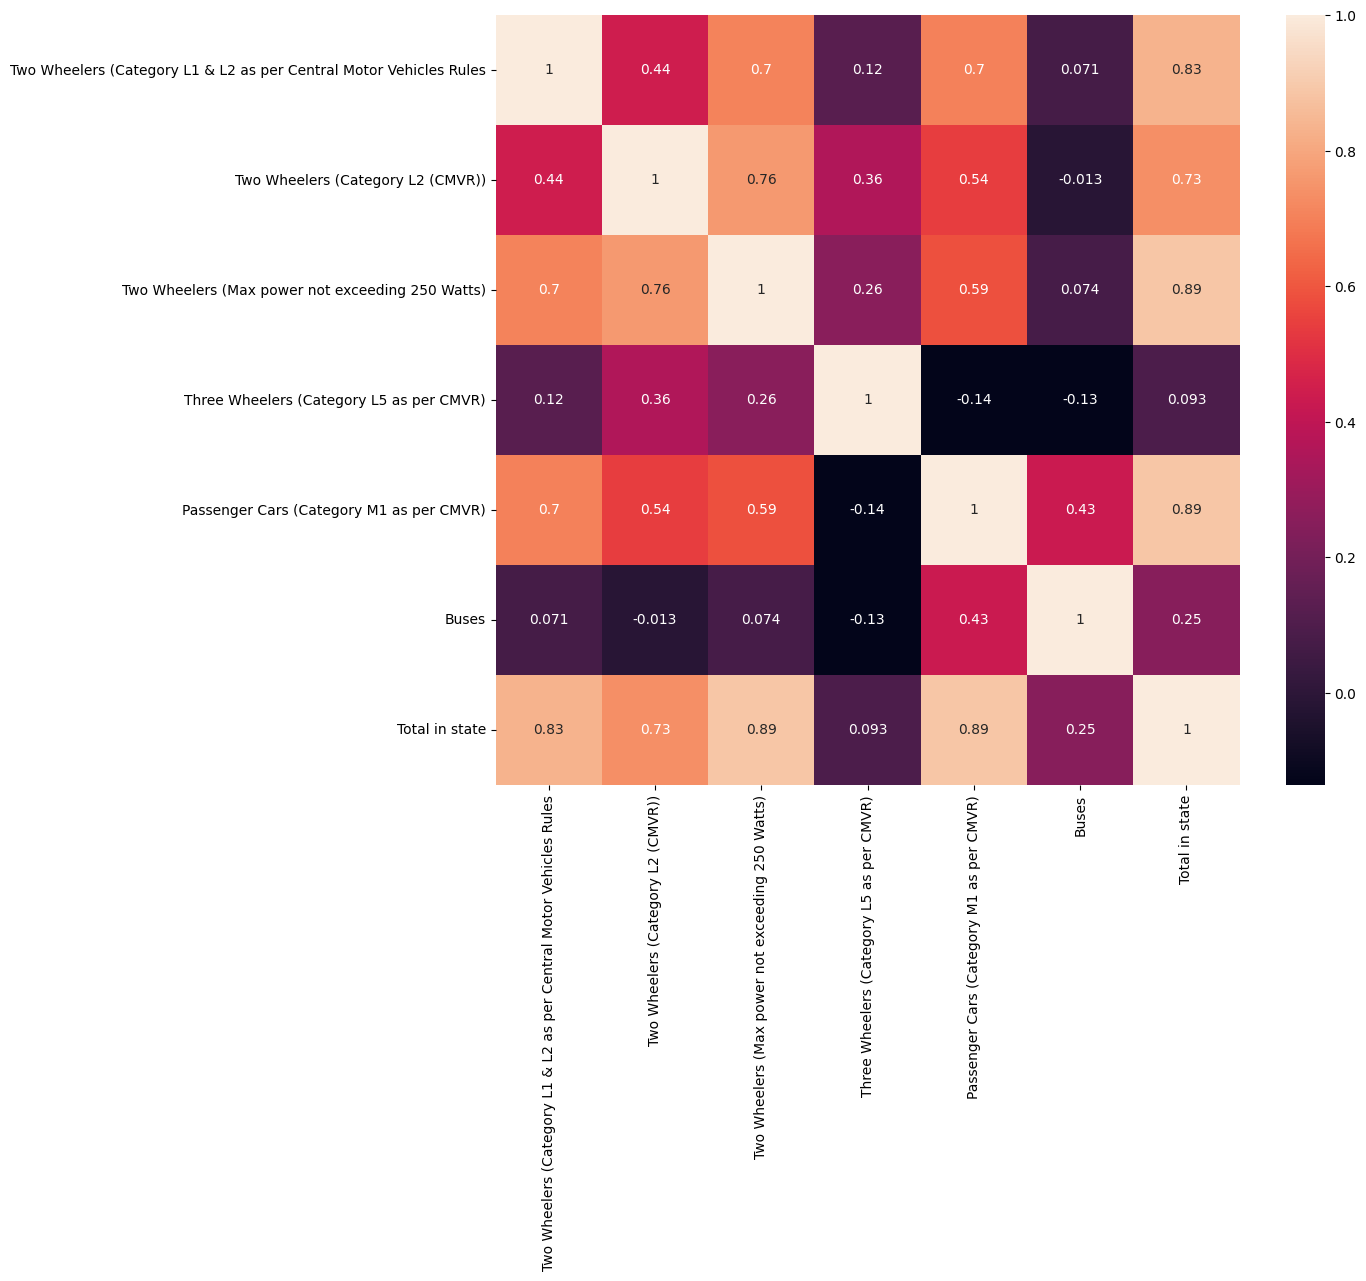

In [14]:
ax= plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [15]:
fig = px.bar(df,x='State',y = 'Total in state',color = 'State',title = 'Number of vehilces in different states',labels = {'x':'States','y':'Total Vehicles'})
pio.show(fig)

In [16]:
fig = px.pie(df,names = 'State',values = 'Total in state')
pio.show(fig)

In [17]:
fig = px.scatter_3d(df,x = 'State',y = 'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',z = 'Two Wheelers (Category L2 (CMVR))',color='State')
pio.show(fig)

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,1.000000,0.441499,0.703658,0.121309,0.701839,0.071319,0.834433
Two Wheelers (Category L2 (CMVR)),0.441499,1.000000,0.761534,0.360301,0.539824,-0.013090,0.734066
Two Wheelers (Max power not exceeding 250 Watts),0.703658,0.761534,1.000000,0.255484,0.585362,0.073515,0.885692
Three Wheelers (Category L5 as per CMVR),0.121309,0.360301,0.255484,1.000000,-0.136466,-0.134569,0.092784
Passenger Cars (Category M1 as per CMVR),0.701839,0.539824,0.585362,-0.136466,1.000000,0.430161,0.887993
Buses,0.071319,-0.013090,0.073515,-0.134569,0.430161,1.000000,0.252804
Total in state,0.834433,0.734066,0.885692,0.092784,0.887993,0.252804,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '16.0'),
  Text(4, 0, '28.0'),
  Text(5, 0, '75.0'),
  Text(6, 0, '252.0'),
  Text(7, 0, '377.0'),
  Text(8, 0, '423.0'),
  Text(9, 0, '431.0'),
  Text(10, 0, '432.0'),
  Text(11, 0, '463.0'),
  Text(12, 0, '491.0'),
  Text(13, 0, '503.0'),
  Text(14, 0, '535.0'),
  Text(15, 0, '612.0'),
  Text(16, 0, '613.0'),
  Text(17, 0, '698.0'),
  Text(18, 0, '784.0'),
  Text(19, 0, '1395.0'),
  Text(20, 0, '1451.0'),
  Text(21, 0, '2036.0'),
  Text(22, 0, '2630.0'),
  Text(23, 0, '2954.0'),
  Text(24, 0, '3162.0'),
  Text(25, 0, '7182.0')])

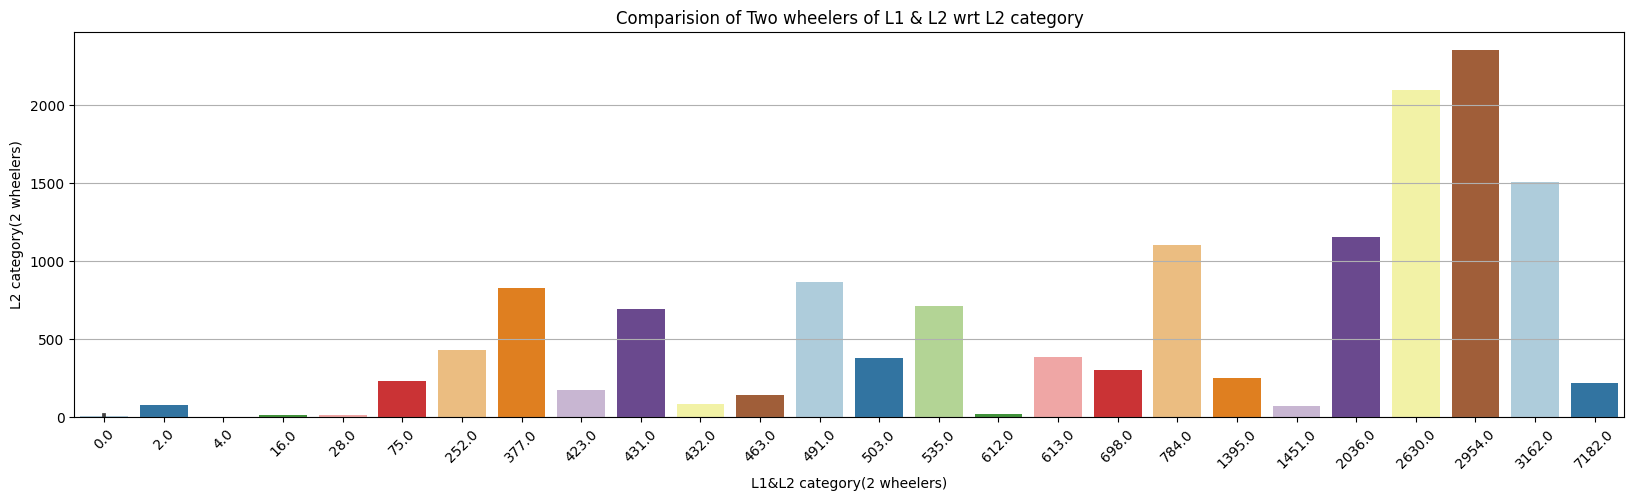

In [19]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',y='Two Wheelers (Category L2 (CMVR))',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Comparision of Two wheelers of L1 & L2 wrt L2 category')
plt.xlabel('L1&L2 category(2 wheelers)')
plt.ylabel('L2 category(2 wheelers)')
plt.xticks(rotation=45)

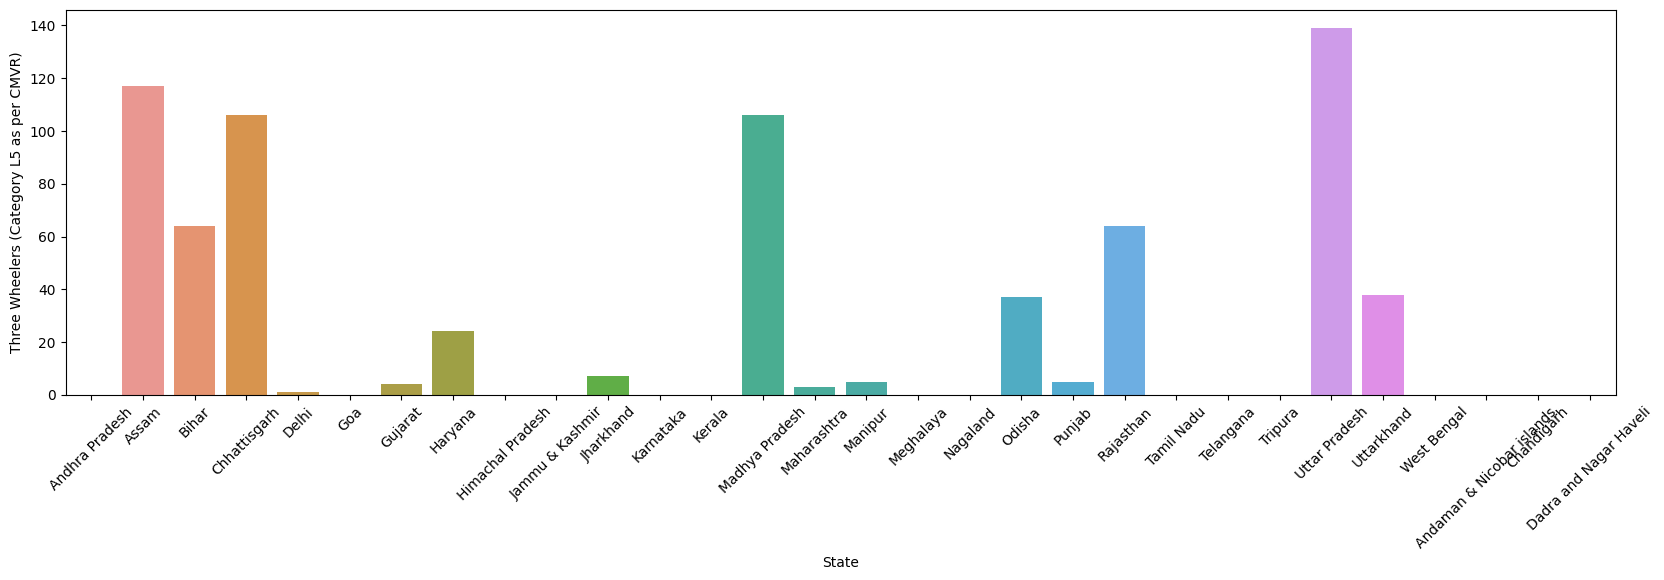

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['State'] , y=df['Three Wheelers (Category L5 as per CMVR)'])
plt.xticks(rotation=45)
plt.show()

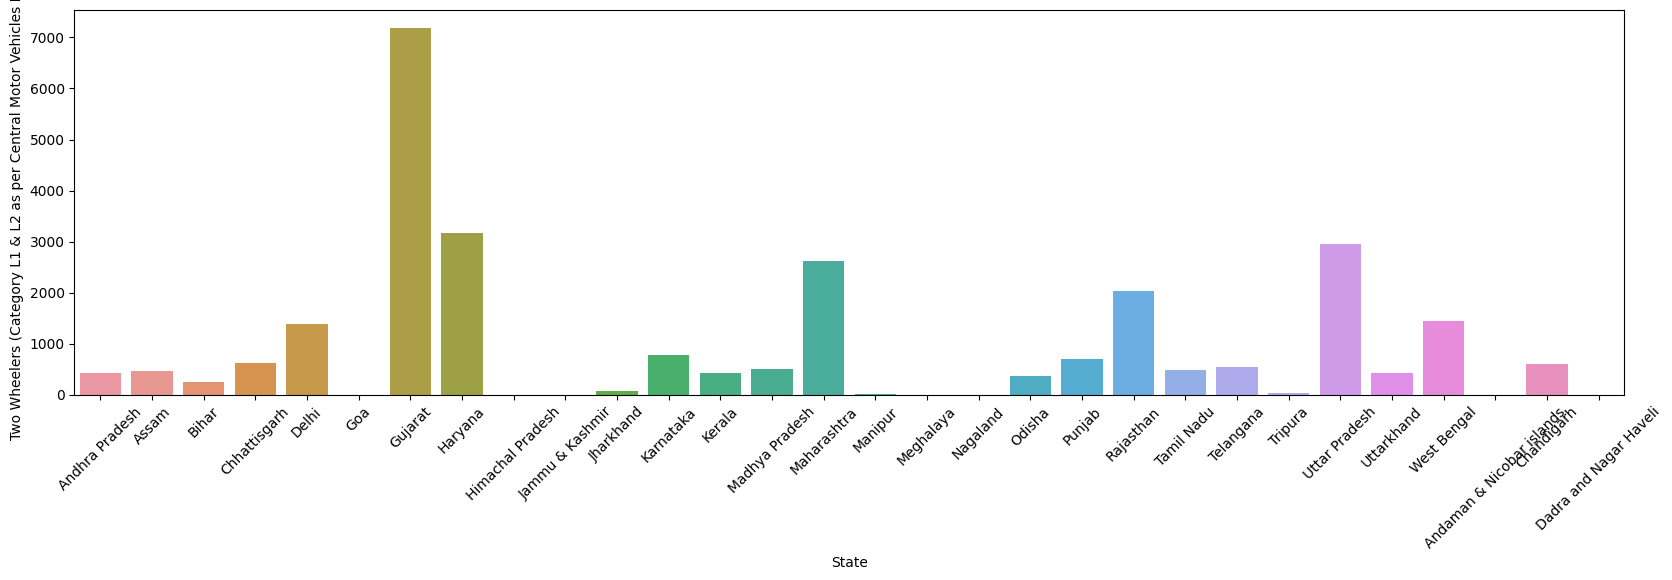

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['State'] , y=df['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'])
plt.xticks(rotation=45)
plt.show()

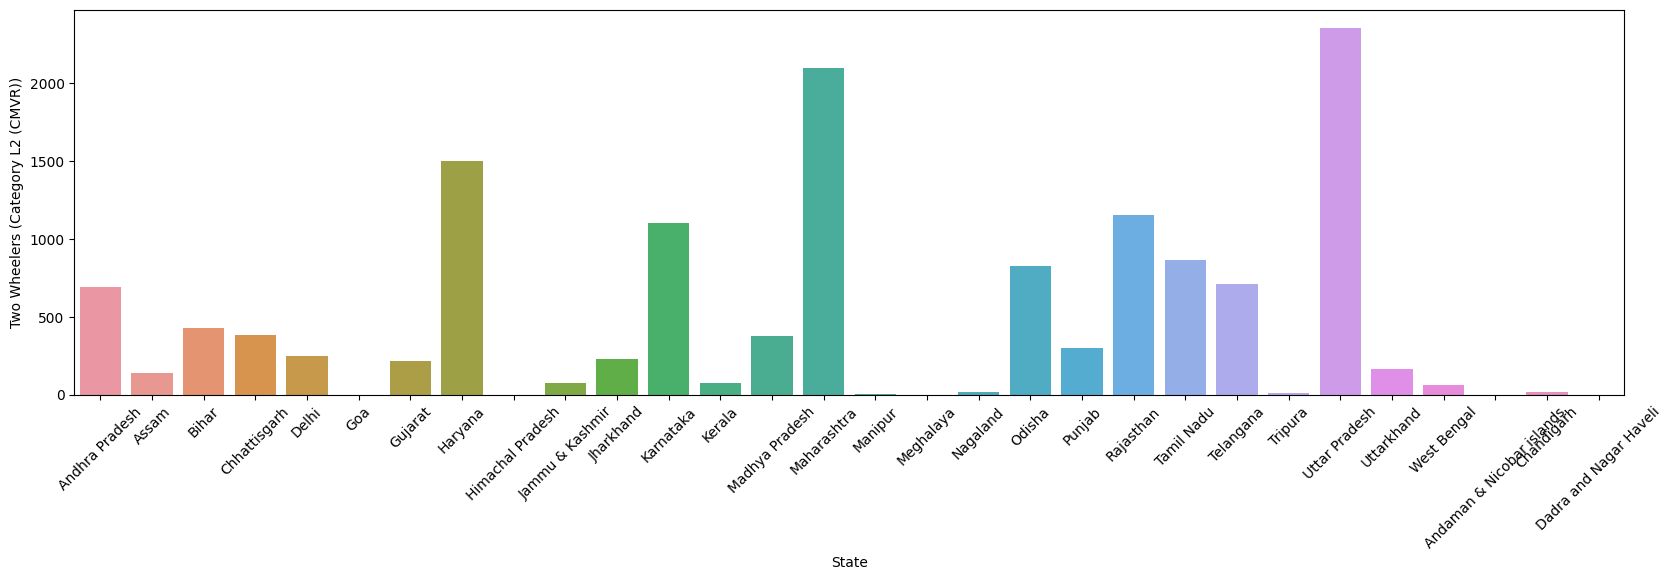

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['State'] , y=df['Two Wheelers (Category L2 (CMVR))'])
plt.xticks(rotation=45)
plt.show()

Comparision plot of Diffferent vehilces wrt State

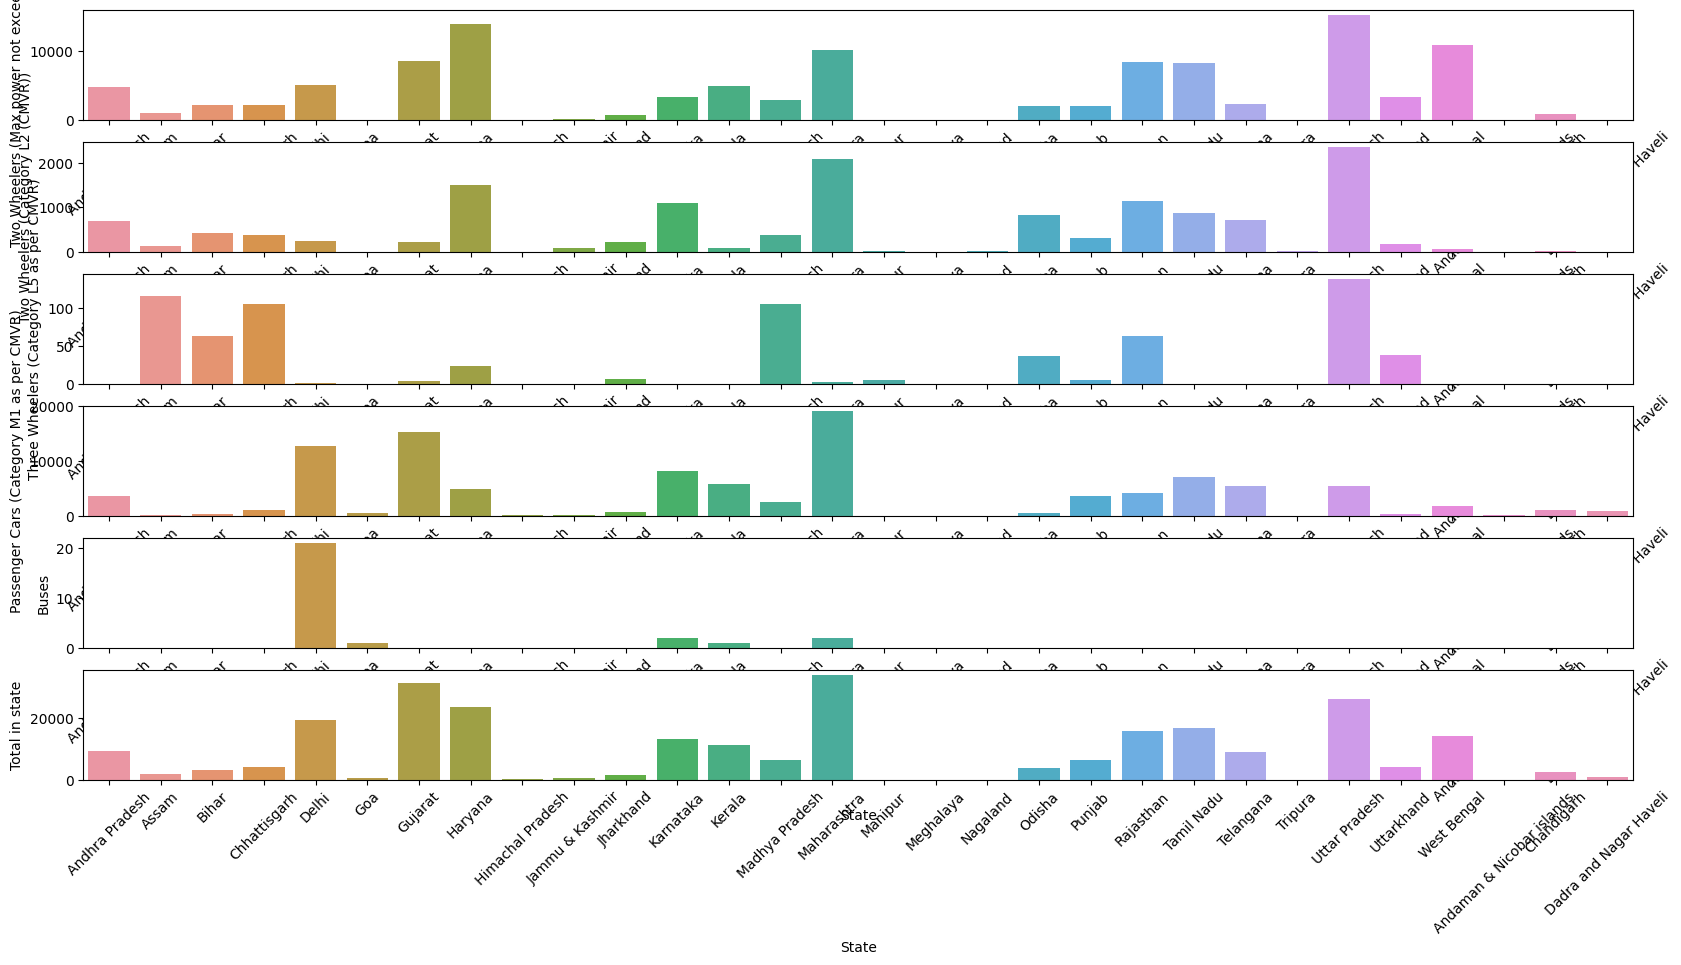

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(6,1,1)
sns.barplot(x='State' , y='Two Wheelers (Max power not exceeding 250 Watts)', data=df)
plt.xticks(rotation=45)
plt.subplot(6,1,2)
sns.barplot(x='State' , y='Two Wheelers (Category L2 (CMVR))', data=df)
plt.xticks(rotation=45)
plt.subplot(6,1,3)
sns.barplot(x='State' , y='Three Wheelers (Category L5 as per CMVR)', data=df)
plt.xticks(rotation=45)
plt.subplot(6,1,4)
sns.barplot(x='State' , y='Passenger Cars (Category M1 as per CMVR)', data=df)
plt.xticks(rotation=45)
plt.subplot(6,1,5)
sns.barplot(x='State' , y='Buses', data=df)
plt.xticks(rotation=45)
plt.subplot(6,1,6)
sns.barplot(x='State' , y='Total in state', data=df)
plt.xticks(rotation=45)
plt.show()


## Regression 

Defining x and y values 

In [26]:
x=df[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 as per CMVR)', 'Passenger Cars (Category M1 as per CMVR)','Buses']]
y=df['Total in state']
     

Finding out the linear regression using OLS method and fitting the model 

In [27]:
x= sm.add_constant(x)
results = sm.OLS(y,x)
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total in state   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.531e+06
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           3.24e-63
Time:                        06:42:20   Log-Likelihood:                -124.64
No. Observations:                  30   AIC:                             263.3
Df Residuals:                      23   BIC:                             273.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                 -1.7864      4.758     -0.375      0.711     -11.629       8.056
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules     1.0097      0.004    226.547      0.000       1.000       1.019
Two Wheelers (Category L2 (CMVR))                                      1.0305      0.011     96.356      0.000       1.008       1.053
Two Wheelers (Max power not exceeding 250 Watts)                       1.0023      0.002    651.866      0.000       0.999       1.005
Three Wheelers (Category L5 as per CMVR)                               1.0645      0.101     10.533      0.000       0.855       1.274
Passenger Cars (Category M1 as per CMVR)                               0.9942      0.002    652.890      0.000       0.991       0.997
Buses                                                                  3.0912      1.121      2.757      0.011       0.772       5.411
==============================================================================
Omnibus:                        2.222   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.020
Skew:                           0.201   Prob(JB):                        0.600
Kurtosis:                       3.810   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2=(r2_score(y_test,pred))
print(r2*100)     

99.99804115000313


Around 99.99% of dependant variables has been explained in independent variables. So we can use this Mahcine Learning Algorithm for this dataset. 

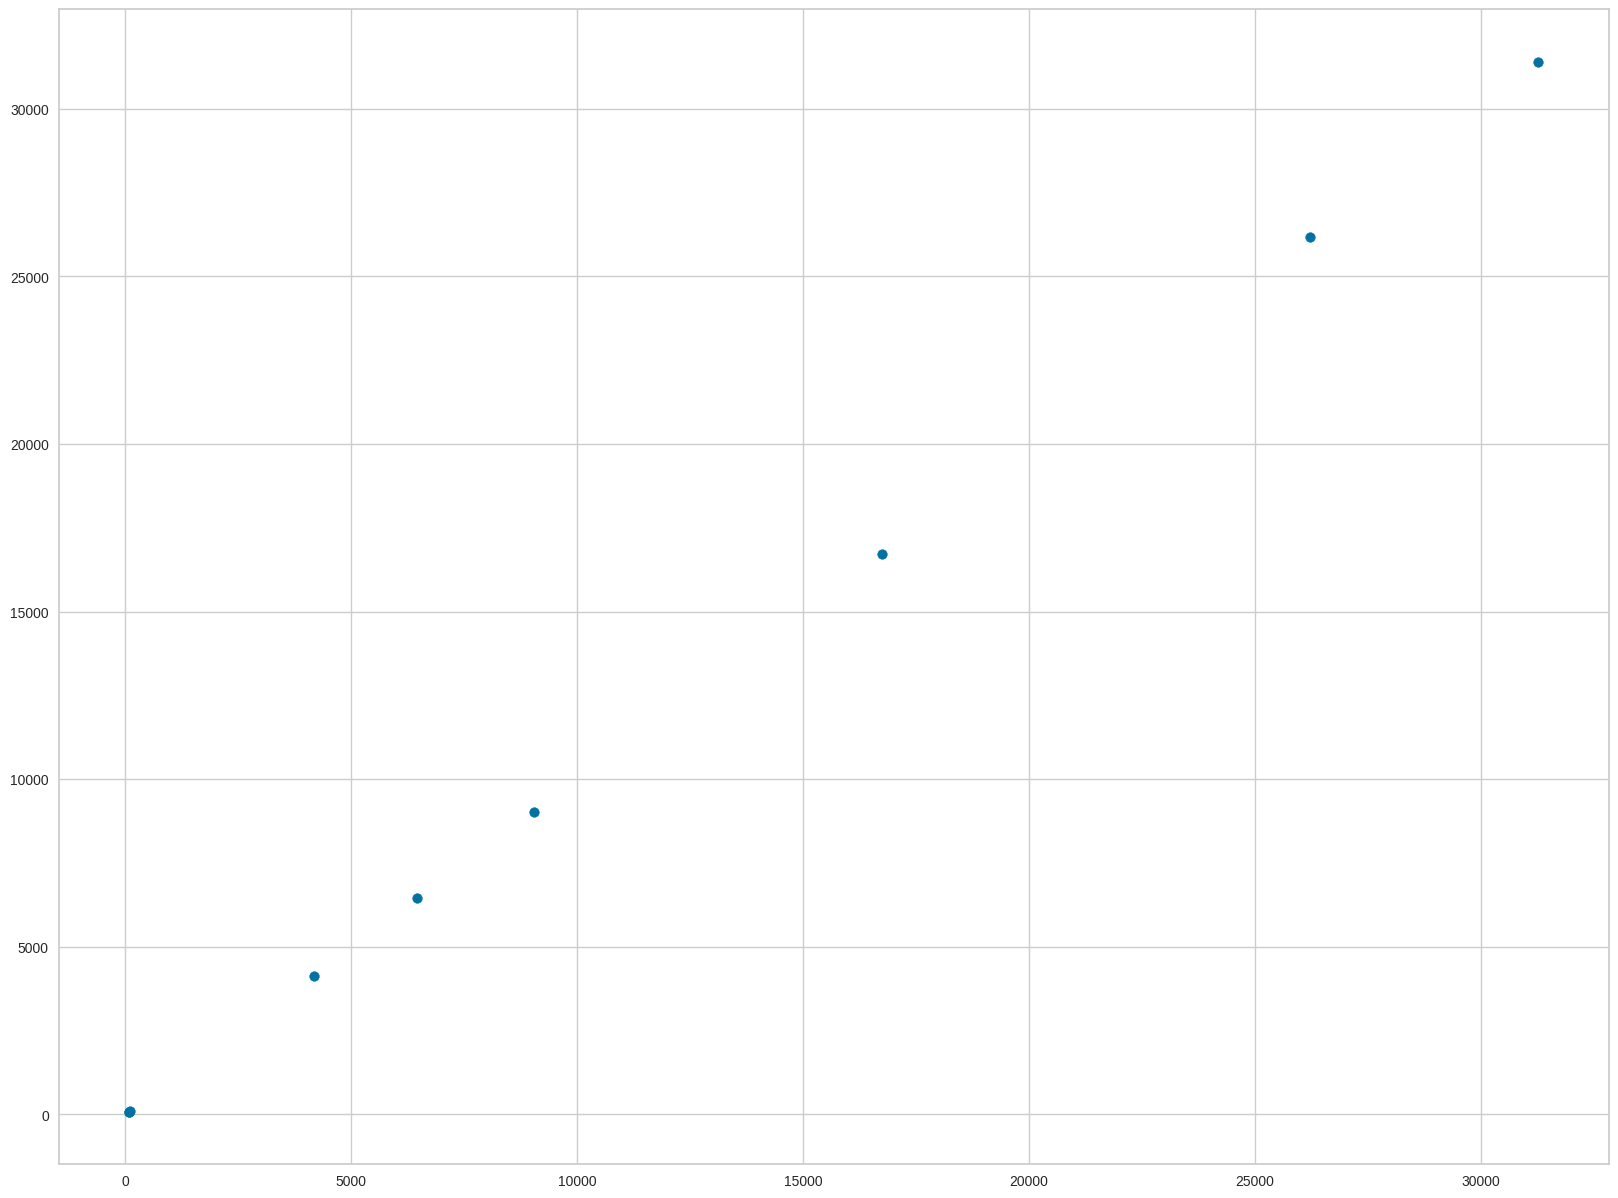

In [44]:
plt.scatter(y_test, pred)

<ipython-input-45-ebde3eea2a06>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Total in state', ylabel='Density'>

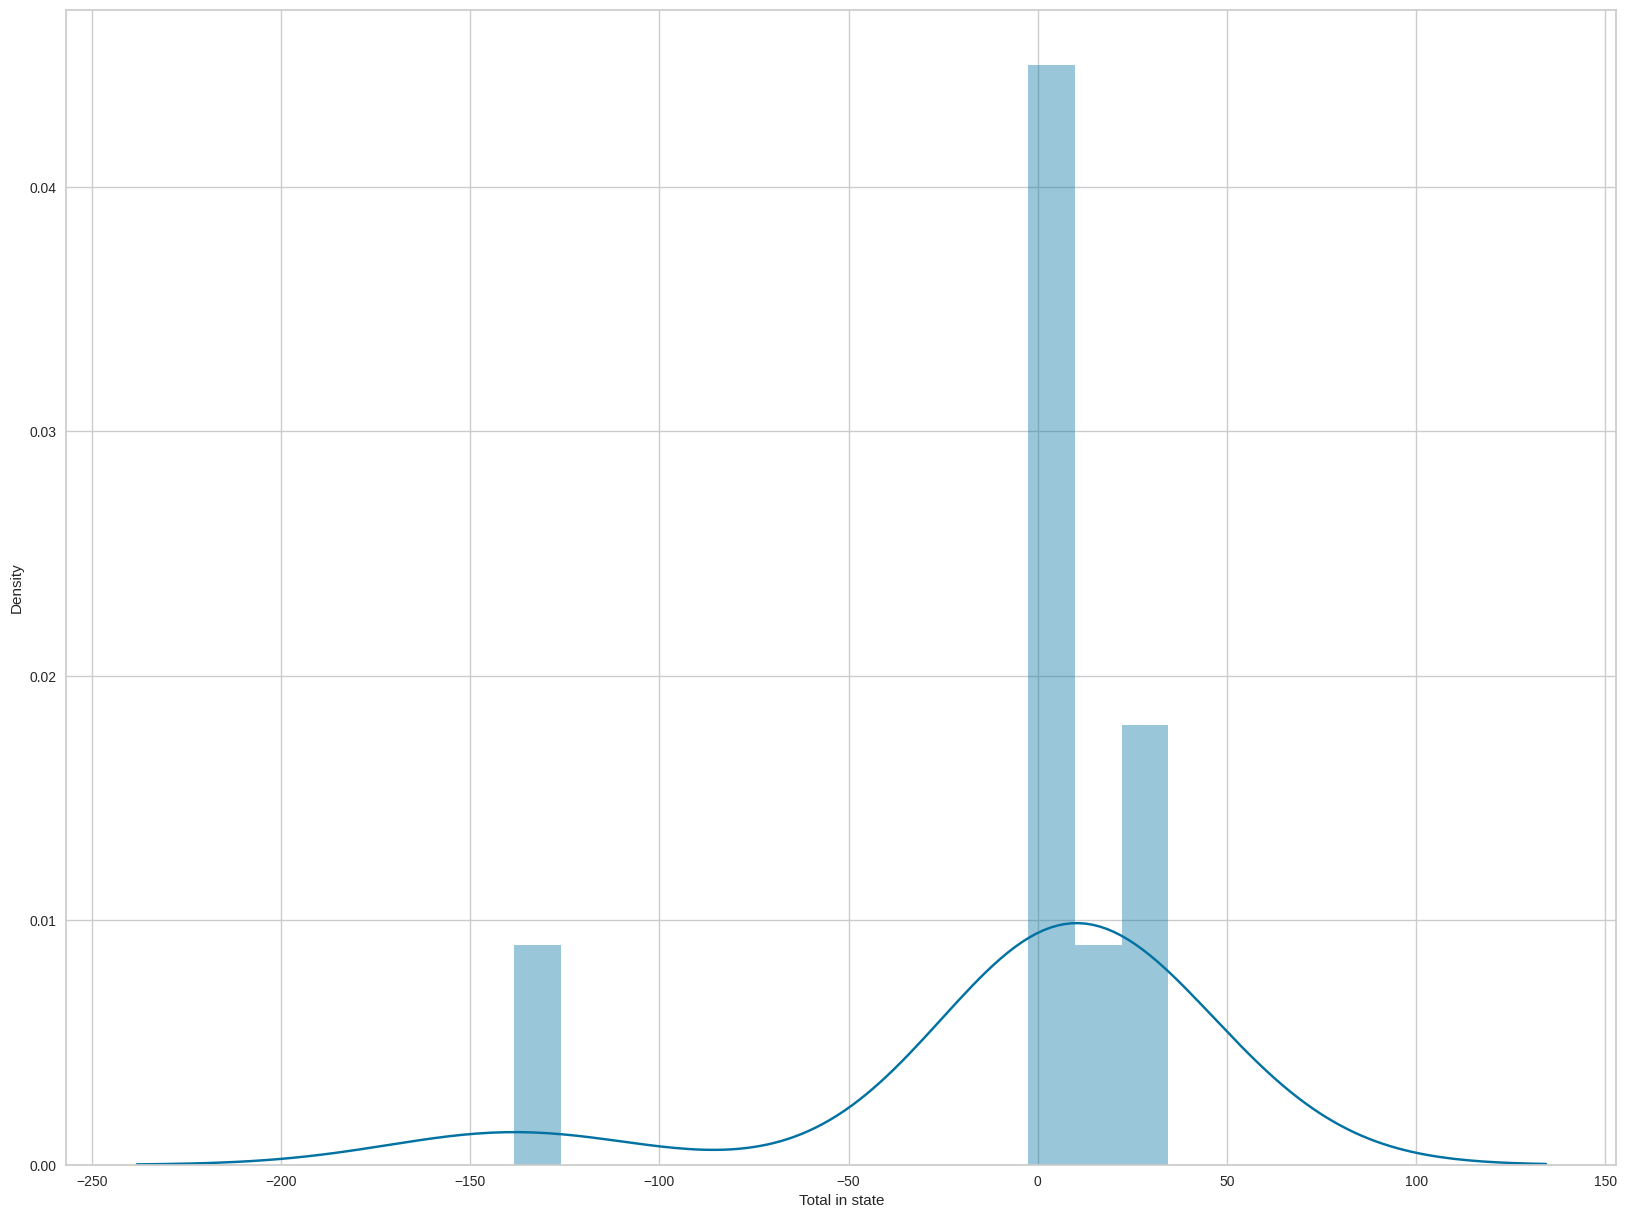

In [45]:
#Residual histogram plot
sns.distplot((y_test-pred))

In [46]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 25.442335836641423
MSE: 2395.809767983062
RMSE: 48.94700979613629
